Some code to study the overall RFI stats generated from Jiapeng Zhang's RFI flagging work. It plots the % of times a given frequency bin is flagged, as well as the overall % of band masked for a chosen occurance threshold.

In [32]:
import csv
import matplotlib as mpl
import pylab as plt
import numpy as np

In [17]:
#Read the csv file
rows = []
with open('RFI_for_L.csv', newline='') as csvfile:
    Lband = csv.reader(csvfile, delimiter=',')
    next(Lband)
    for row in Lband:
        row[2] = row[2].replace("\n", "")
        rows.append(row)

In [104]:
#L-band range
Freq_Bins = np.arange(856,1712,1)  #Counting no. of rfi flags every 1 Hz
Occ_Counts = np.zeros(len(Freq_Bins))


In [122]:
#Loop through each line (filename), use the histogram function to count the number of flagged freq that falls under each Freq_bin

for i in range(len(rows)):
    filename = rows[i][1]
    tmp = rows[i][2].replace("[", "").replace("]", "").split()
    x = np.array(tmp)
    RFI = x.astype(np.float)
    histo=np.histogram(RFI,bins=np.append(Freq_Bins,Freq_Bins[-1]+1))
    Occ_Counts = Occ_Counts + histo[0]

<ipython-input-122-9a00dd74e1bd>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RFI = x.astype(np.float)


In [126]:
#Figure out % of band flagged for a given threshold
Threshold_Bins = np.arange(0,np.max(Occ_Counts),10)
histo=np.histogram(Occ_Counts,bins=np.append(Threshold_Bins,Threshold_Bins[-1]+10))

#Use the cumulative sum function to find out the % of band masked. need to flip the array so the sum is correct
Percent_band = histo[0]
Percent_band = np.cumsum(np.flip(Percent_band))

Text(0.5, 0, 'No. of freq bins')

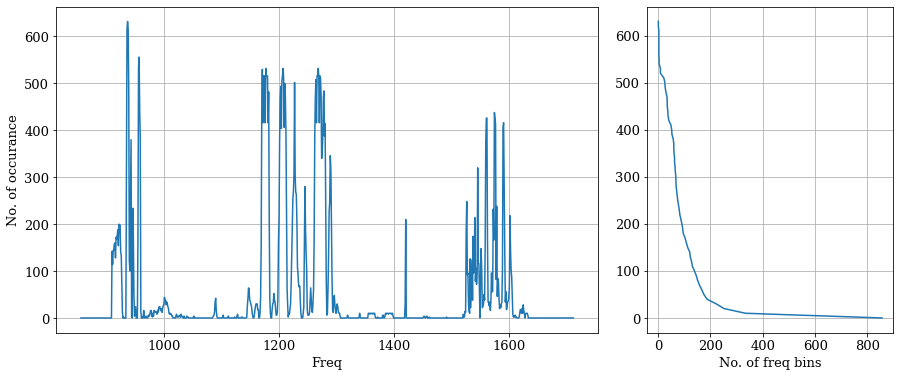

In [127]:
fig = plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.2)
mpl.rcParams.update({'font.size': 13,'font.family': 'serif'})



ax = plt.subplot2grid((1,3),(0,0), rowspan=1,colspan=2)
ax.plot(Freq_Bins,Occ_Counts)
ax.set_ylabel("No. of occurance")
ax.set_xlabel("Freq")
ax.grid()


ax2 = plt.subplot2grid((1,3),(0,2), rowspan=1,colspan=1)
ax2.plot(np.flip(Percent_band),Threshold_Bins)
ax2.grid()
ax2.set_xlabel("No. of freq bins")